In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mengunduh data Bitcoin
symbol = "BNB-USD"
data = yf.download(tickers=symbol, interval="5d", period="max")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Menghitung Moving Average (MA)
data['MA_3'] = data['Close'].rolling(window=3).mean()  # 3-day moving average
data['MA_5'] = data['Close'].rolling(window=5).mean()  # 5-day moving average
data['MA_30'] = data['Close'].rolling(window=5).mean()  # 30-day moving average

In [ ]:
# Menghitung Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, window=7)  # Menggunakan periode RSI 7

Price        Adj Close       Close        High         Low        Open  \
Ticker         BNB-USD     BNB-USD     BNB-USD     BNB-USD     BNB-USD   
Date                                                                     
2017-11-09    1.990770    1.990770    2.174230    1.893940    2.053140   
2017-11-14    1.592580    1.592580    1.735370    1.568270    1.689280   
2017-11-19    1.613770    1.613770    1.701230    1.567800    1.673360   
2017-11-24    1.717710    1.717710    1.820180    1.555580    1.569530   
2017-11-29    1.751530    1.751530    2.051590    1.683170    1.924340   
...                ...         ...         ...         ...         ...   
2024-11-27  644.948486  644.948486  646.851807  608.621460  613.587280   
2024-12-02  647.594482  647.594482  667.423706  629.906006  655.932495   
2024-12-07  750.272644  750.272644  761.091431  730.873962  732.006287   
2024-12-12  705.944214  705.944214  725.221680  700.106750  711.811401   
2024-12-17  698.571899  698.571899  73

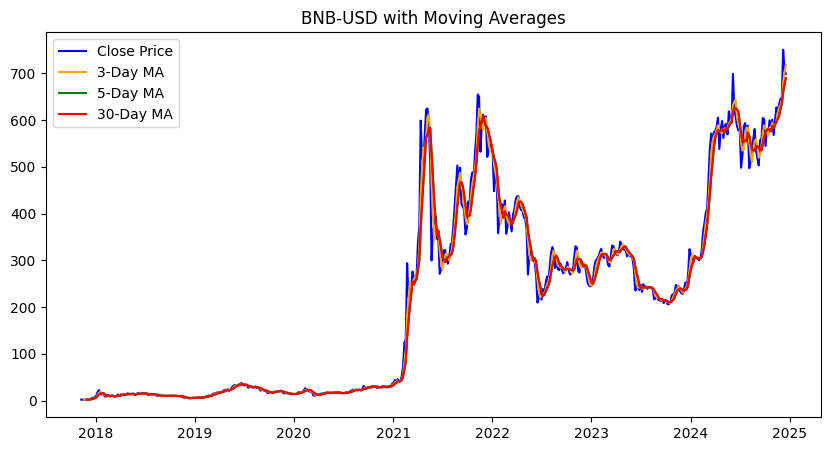

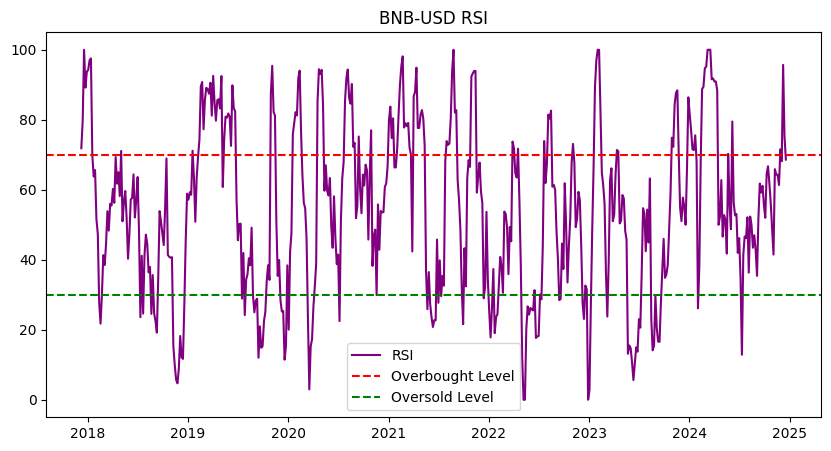

In [ ]:
# Menampilkan data dengan indikator teknikal
print(data)

# Plotting Moving Average
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label="Close Price", color='blue')
plt.plot(data['MA_3'], label="3-Day MA", color='orange')
plt.plot(data['MA_5'], label="5-Day MA", color='green')
plt.plot(data['MA_30'], label="30-Day MA", color='red')
plt.title("BNB-USD with Moving Averages")
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(10, 5))
plt.plot(data['RSI'], label="RSI", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought Level")
plt.axhline(30, color='green', linestyle='--', label="Oversold Level")
plt.title("BNB-USD RSI")
plt.legend()
plt.show()

In [ ]:
# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Pilih hanya harga penutupan (Close)
closing_prices = btc_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))

# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Langkah 1: Ambil data historis Bitcoin dari yfinance
# Gunakan simbol BTC-USD untuk Bitcoin dalam USD
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-12-01')

# Pilih hanya harga penutupan (Close)
closing_prices = btc_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Langkah 5: Prediksi harga selama 1 tahun ke depan
# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, closing_prices, color='blue', label='Harga BNB-USD Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga BNB-USD (1 Tahun)')
plt.title('Prediksi Harga Bitcoin Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga BNB-USD')
plt.legend()
plt.show()

# **Evaluasi Keakuratan**
# Untuk perbandingan, kita butuh data aktual untuk periode prediksi (misalnya data yang benar-benar sudah terjadi untuk satu tahun ke depan)
# Misalnya jika Anda punya data untuk 1 tahun setelah data pelatihan, Anda bisa menggunakan itu untuk menghitung MAE, RMSE, dsb.

# Jika kita mengasumsikan bahwa prediksi adalah valid (misalnya Anda memiliki data sebenarnya untuk tahun mendatang),
# kita bisa mengukur MAE dan RMSE.
actual_prices = closing_prices[-days_in_year:].values  # Asumsi data aktual harga Bitcoin di masa depan
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Langkah 1: Ambil data historis Bitcoin dari yfinance
# Gunakan simbol BTC-USD untuk Bitcoin dalam USD
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-12-01')

# Pilih hanya harga penutupan (Close)
closing_prices = btc_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Langkah 5: Prediksi harga selama 1 tahun ke depan
# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, closing_prices, color='blue', label='Harga Bitcoin Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga Bitcoin (1 Tahun)')
plt.title('Prediksi Harga Bitcoin Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga BNB-USD')
plt.legend()
plt.show()

# **Evaluasi Keakuratan**
# Untuk perbandingan, kita butuh data aktual untuk periode prediksi (misalnya data yang benar-benar sudah terjadi untuk satu tahun ke depan)
# Misalnya jika Anda punya data untuk 1 tahun setelah data pelatihan, Anda bisa menggunakan itu untuk menghitung MAE, RMSE, dsb.

# Jika kita mengasumsikan bahwa prediksi adalah valid (misalnya Anda memiliki data sebenarnya untuk tahun mendatang),
# kita bisa mengukur MAE dan RMSE.
actual_prices = closing_prices[-days_in_year:].values  # Asumsi data aktual harga Bitcoin di masa depan
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Langkah 1: Ambil data historis Bitcoin dari yfinance
# Gunakan simbol BTC-USD untuk Bitcoin dalam USD
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-12-01')

# Pilih hanya harga penutupan (Close)
closing_prices = btc_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Langkah 5: Prediksi harga selama 1 tahun ke depan
# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, closing_prices, color='blue', label='Harga Bitcoin Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga Bitcoin (1 Tahun)')
plt.title('Prediksi Harga Bitcoin Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga BNB-USD')
plt.legend()
plt.show()

# **Evaluasi Keakuratan**
# Untuk perbandingan, kita butuh data aktual untuk periode prediksi (misalnya data yang benar-benar sudah terjadi untuk satu tahun ke depan)
# Misalnya jika Anda punya data untuk 1 tahun setelah data pelatihan, Anda bisa menggunakan itu untuk menghitung MAE, RMSE, dsb.

# Jika kita mengasumsikan bahwa prediksi adalah valid (misalnya Anda memiliki data sebenarnya untuk tahun mendatang),
# kita bisa mengukur MAE dan RMSE.
actual_prices = closing_prices[-days_in_year:].values  # Asumsi data aktual harga Bitcoin di masa depan
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Langkah 1: Ambil data historis Bitcoin dari yfinance
# Gunakan simbol BTC-USD untuk Bitcoin dalam USD
btc_data = yf.download('BNB-USD', start='2020-01-01', end='2024-12-19')

# Pilih hanya harga penutupan (Close)
closing_prices = btc_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Langkah 5: Prediksi harga selama 1 tahun ke depan
# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, closing_prices, color='blue', label='Harga BNB-USD Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga Bitcoin (1 Tahun)')
plt.title('Prediksi Harga Bitcoin Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga BNB-USD')
plt.legend()
plt.show()

# **Evaluasi Keakuratan**
# Untuk perbandingan, kita butuh data aktual untuk periode prediksi (misalnya data yang benar-benar sudah terjadi untuk satu tahun ke depan)
# Misalnya jika Anda punya data untuk 1 tahun setelah data pelatihan, Anda bisa menggunakan itu untuk menghitung MAE, RMSE, dsb.

# Jika kita mengasumsikan bahwa prediksi adalah valid (misalnya Anda memiliki data sebenarnya untuk tahun mendatang),
# kita bisa mengukur MAE dan RMSE.
actual_prices = closing_prices[-days_in_year:].values  # Asumsi data aktual harga Bitcoin di masa depan
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Hitung jumlah hari dalam 1 tahun (365 hari)
days_in_year = 365

# Ambil data 60 hari terakhir untuk prediksi
last_60_days = scaled_data[-time_steps:]

# Membuat list untuk menyimpan hasil prediksi
predicted_prices = []

# Prediksi untuk setiap hari berikutnya selama 365 hari
for i in range(days_in_year):
    # Prediksi harga untuk hari ke-i
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Perbarui data input untuk prediksi hari berikutnya
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Konversi prediksi harga ke bentuk yang bisa dipetakan ke skala asli (USD)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Langkah 6: Visualisasi Hasil Prediksi
# Buat tanggal untuk prediksi 1 tahun ke depan
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot harga historis dan prediksi harga 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, closing_prices, color='blue', label='Harga Bitcoin Aktual')
plt.plot(predicted_dates, predicted_prices, color='red', label='Prediksi Harga Bitcoin (1 Tahun)')
plt.title('Prediksi Harga Bitcoin Selama 1 Tahun ke Depan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga BNB-USD')
plt.legend()
plt.show()

# **Evaluasi Keakuratan**
# Untuk perbandingan, kita butuh data aktual untuk periode prediksi (misalnya data yang benar-benar sudah terjadi untuk satu tahun ke depan)
# Misalnya jika Anda punya data untuk 1 tahun setelah data pelatihan, Anda bisa menggunakan itu untuk menghitung MAE, RMSE, dsb.

# Jika kita mengasumsikan bahwa prediksi adalah valid (misalnya Anda memiliki data sebenarnya untuk tahun mendatang),
# kita bisa mengukur MAE dan RMSE.
actual_prices = closing_prices[-days_in_year:].values  # Asumsi data aktual harga Bitcoin di masa depan
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')